<a href="https://colab.research.google.com/github/compartia/nlp_tools/blob/demo/UI_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#.init

##utils

In [0]:
import IPython
import uuid
from google.colab import output
from google.colab import files

from __future__ import print_function

from google.colab import widgets
from google.colab import output



# from google.colab import files

def interactive_upload(filetype):
  
  import docx2txt
  
  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs=[]
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text
  
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs
  
  
  
  
class InvokeButton(object):
  def __init__(self, title, callback = None):
    self.title = title
    self.callback = callback

#   def _repr_html_(self):
  def render(self):
    self.callback_id = 'button-' + str(uuid.uuid4())
    if self.callback:
      output.register_callback(self.callback_id, self.callback)

    template =f'''<button style="padding:5px; font-size:16px; margin:15px"  id="{self.callback_id}">{self.title}</button>
        <script>
          document.querySelector("#{self.callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction("{self.callback_id}", [], {{}})
            e.preventDefault();
          }};
        </script>'''
    display(IPython.display.HTML(template))
    
def upload_file_b(tb, type):
  with output.redirect_to_element('#upload_area'): 
  
    print(f'Загрузка документа типа "{type}"')
    print('Select .docx files:')
    uploaded = interactive_upload(type)

#   with tb.output_to(type):
#     for fn in uploaded:
#       print(f'User uploaded file "{fn[0:1000]}" with length {len(fn)} bytes')

def clear_div(elementID):
  display(IPython.display.Javascript(f'document.getElementById("{elementID}").innerHTML = "";'))

def replace_self_elem(elementID, text):
  #print(f'Replace: {elementID}')
  display(IPython.display.Javascript(f'document.getElementById("{elementID}").parentElement.innerHTML = "{text}";'))

def toggle_element(elementId):
  display(IPython.display.Javascript(f''' 
    var x = document.getElementById("{elementId}");
    if (x.style.display === "none")
      x.style.display = "block";
    else
      x.style.display = "none";
    '''))
  
def call_invoke(title, callback):
  with output.redirect_to_element('#items'):    
    InvokeButton(title, callback).render()
    
  clear_div("upload_area")
  
  
GLOBALS__ = {}

#Демо

In [0]:
#@title Настройки { run: "auto", vertical-output: true, display-mode: "form" }
USD_to_RUB = 34.02 #@param {type:"number"}
RUB_to_USD = 1.0/USD_to_RUB

# print('USD_to_RUB=',USD_to_RUB)
# print('RUB_to_USD=',RUB_to_USD)



currency_converter = {
  'USD': USD_to_RUB,
  'RUB': 1.0
}

print(currency_converter)

{'USD': 164.02, 'RUB': 1.0}


In [0]:
# @title Настройка версии { vertical-output: true, output-height: 800, display-mode: "form" }


import os
import sys



def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs


# ====================================
# ====================================
_git_branch = "demo"  # @param {type:"string"}
# ====================================
# ====================================
 


# AZ:-IMPORT CODE GITHUB-----------------------------------------------------------------------------------
def _init_import_code_from_gh():
  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  print(f"fetching code from GitHub.....{_git_branch}")
  l1 = 'rm -r nlp_tools'
  l2 = f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools'
  os.system(l1)
  os.system(l2)
  import subprocess
  r = subprocess.check_output(
    'cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B',
    shell=True)
  print('🦊 GIT revision:', str(r).replace('\\n', '\t'))

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  untokenize(['code', 'ok'])
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  r = subprocess.check_output('sudo apt-get install antiword', shell=True)
  print(r)

  print('installing docx2txt...')
  r = subprocess.check_output("pip install docx2txt", shell=True)
  r = print(r)
  print(r)
  GLOBALS__['_init_import_code_from_gh'] = True
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow as tf
import tensorflow_hub as hub


def _import_elmo():
  """
  ACHTUNG!! this method is called later by ElmoEmbedder
  """

  #   if 'elmo' in GLOBALS__:
  #     print('👌 Tensorflow hub.Module is already imported ')
  #     return GLOBALS__['elmo']

  elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz',
                    trainable=False)  # twitter
  print('❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module ')
  print('Tensorflow version is', tf.__version__)

  return elmo


#   GLOBALS__['elmo'] = elmo

#   print(GLOBALS__['elmo'].__dict__)
#   return GLOBALS__['elmo']


# AZ:-INIT EMBEDDER-----------------------------------------------------------------------------------

def _init_embedder():
  if 'elmo_embedder' in GLOBALS__:
    print('👌 Embedder is already created! ')
    return

  from embedding_tools import ElmoEmbedder
  GLOBALS__['elmo_embedder'] = ElmoEmbedder(_import_elmo(), tf, 'elmo', _import_elmo)

  print('❤️ DONE creating words embedding model')
  return GLOBALS__['elmo_embedder']


# AZ:-Init chartes context-----------------------------------------------------------------------------------
def _init_charters():
  if 'CharterAnlysingContext' in GLOBALS__:
    print('👌 Charters-related tools are already inited ')
    return

  from demo_charter import CharterAnlysingContext
  GLOBALS__['CharterAnlysingContext'] = CharterAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['renderer'])
  print('❤️ DONE initing Charters-related tools and models ')


def _init_contracts():
  if 'ContractAnlysingContext' in GLOBALS__:
    print('👌 Contracts-related tools are already inited ')
    return

  from demo import ContractAnlysingContext
  GLOBALS__['ContractAnlysingContext'] = ContractAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['renderer'])
  print('❤️ DONE initing Contracts-related tools and models ')


# AZ:- THE CODE----------------------------------------------------------------------------------
def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  import matplotlib.pyplot as plt
  from renderer import AbstractRenderer, head_types_colors
  from transaction_values import ValueConstraint
  from legal_docs import org_types
  from demo_charter import head_types_dict, head_types

  class DemoRenderer(AbstractRenderer):

    def render_subj(self, doc):
      from demo import subject_types_dict
      subj = doc.subject
      s_name = subject_types_dict[subj[0]].upper()

      display(
        HTML(f'Предмет договора:<h3 style="margin:0">{s_name}<sup> {subj[0]}</sup> </h3> confidence:{subj[1]:20,.2f}'))

    def sign_to_text(self, sign: int):
      if sign < 0: return " &lt; "
      if sign > 0: return " &gt; "
      return ' = '

    def probable_value_to_html(self, pv):

      vc = pv.value

      color = '#333333'
      if vc.sign > 0:
        color = '#993300'
      elif vc.sign < 0:
        color = '#009933'

      return f'<b style="color:{color}">{self.sign_to_text(vc.sign)} {vc.currency} {vc.value:20,.2f} confidence={pv.confidence:20,.2f}</b> '

    def render_contents(doc):
      html = '<h3>Выявленное Содержание документа</h4>'
      html += "<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li> {line} <sup>line {i}</sup></li>'
      html += "</ul>"

      display(HTML(html))

    def render_sections(sections):
      from legal_docs import HeadlineMeta
      html = '<h3>Выявленное секции документа</h4>'
      html += "<ul>"
      for section_type in sections:
        section: HeadlineMeta = sections[section_type]
        body = section.body.untokenize_cc()[:1000]
        headline = section.subdoc.untokenize_cc()[:500]
        #     line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li><h3> {headline} <sup>type: {section_type}</sup> </h3> <p>{body}</p> </li>'
      html += "</ul>"

      display(HTML(html))

    def render_values(self, values):
      if len(values) > 0:
        for pv in values:
          h = self.probable_value_to_html(pv)
          display(HTML(h))
      else:
        display(HTML('сумма не найдена'))

    def render_contents(self, doc):
      html = '<h3>Выявленное Содержание документа</h4>'
      html += "<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li> {line} <sup>line {i}</sup></li>'
      html += "</ul>"

      display(HTML(html))

    def render_value_section_details(self, value_section_info):
      value_section = value_section_info.body
      headline_doc = value_section_info.subdoc

      headline = headline_doc.untokenize_cc()

      v_names = {
        'value_attention_vector',
        'novalue_attention_vector',

        'novalue_attention_vector_local_contrast',
        'value_attention_vector_tuned'}

      fig = plt.figure(figsize=(20, 6))
      ax = plt.axes()
      for vector_name in v_names:
        ax.plot(value_section.distances_per_pattern_dict[vector_name], label=vector_name, alpha=0.4);
      ax.plot(value_section.distances_per_pattern_dict['value_attention_vector_tuned'], label=vector_name.upper(),
              alpha=0.9, color='black');
      plt.legend(loc='upper right')

      text = self.to_color_text(value_section.tokens_cc,
                                value_section.distances_per_pattern_dict['value_attention_vector_tuned'], _range=(0, 1))
      html = f'<h3>{headline}</h3> <div style="margin-left:4em; font-size=90%">{text}</div>'
      display(HTML(html))

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      if len(tokens) == 0:
        return " - empty -"
      if len(weights) != len(tokens):
        raise ValueError("number of weights differs weights={} tokens={}".format(len(weights), len(tokens)))

      #   if()
      vmin = weights.min()
      vmax = weights.max()

      if _range is not None:
        vmin = _range[0]
        vmax = _range[1]

      if print_debug:
        print(vmin, vmax)

      norm = mpl.colors.Normalize(vmin=vmin - 0.5, vmax=vmax)
      html = ""
      cmap = mpl.cm.get_cmap(colormap)

      for d in range(0, len(weights)):
        word = tokens[d]
        if word == ' ':
          word = '&nbsp;_ '

        html += '<span title="{} {:.4f}" style="background-color:{}">{} </span>'.format(
          d,
          weights[d],
          mpl.colors.to_hex(cmap(norm(weights[d]))),
          word)

        #     html+='<span style="background-color:' +mpl.colors.to_hex(cmap(norm(weights[d]) ))+ '">' + str(tokens[d]) + " </span>"
        if tokens[d] == '\n':
          html += "<br>"

      return html

    def _render_sentence(self, sentence):
      html = ""
      constraints: List[ValueConstraint] = sentence['constraints']
      for probable_v in constraints:
        html += self.value_to_html(probable_v.value)

      if len(constraints) > 0:
        html += '<div style="border-bottom:1px solid #ccc; margin-top:1em"></div>'
        section = sentence['subdoc']
        html += self.to_color_text(section.tokens, section.distances_per_pattern_dict['deal_value_attention_vector'])
      return html

    def render_constraint_values(self, rz):

      html = ''
      for head_type in rz.keys():

        r_by_head_type = rz[head_type]

        html += '<hr style="margin-top: 45px">'
        html += '<i style="padding:0; margin:0">решения о пороговых суммах, которые принимает</i><h2 style="color:{}; padding:0;margin:0">{}</h2>'.format(
          head_types_colors[head_type],
          head_types_dict[head_type])

        sentences = r_by_head_type['sentences']
        html += '<h4>{}</h4>'.format(r_by_head_type['caption'])
        html += '<div style="padding-left:80px">'

        if True:
          if len(sentences) > 0:
            for sentence in sentences:
              html += self._render_sentence(sentence)

          else:
            html += '<h4 style="color:crimson">Пороговые суммы не найдены или не заданы</h4>'

        html += '</div>'

      return html

    def render_charter_parsing_results(self, org, rz):
      txt_html = self.to_color_text(org['tokens'], org['attention_vector'], _range=[0, 1])

      html = '<div style="background:#eeeeff; padding:0.5em"> recognized NE(s): <br><br> org type:<h3 style="margin:0">  {} </h3>org full name:<h2 style="margin:0">  {} </h2> <br>quote: <div style="font-size:90%; background:white">{}</div> </div>'.format(
        org['type_name'], org['name'], txt_html)
      # html+=txt_html
      html += self.render_constraint_values(rz)

      display(HTML(html))

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))

    def print_results(self, doc, results):
      result, (start, end), sentence, meta = results

      html = "<hr>"

      html += self._render_doc_subject_fragments(doc)

      if result is None:
        html += '<h2 style="color:red">СУММА НЕ НАЙДЕНА</h2>'
      else:
        html += '<h2>' + str(result[0]) + ' ' + str(result[1]) + '</h2>'

      for key in meta.keys():
        html += '<div style="font-size:9px">' + str(key) + " = " + str(meta[key]) + "</div>"

      display(HTML(html))
      self.render_color_text(doc.tokens[start:end], doc.sums[start:end])

  GLOBALS__['renderer'] = DemoRenderer()

  
  # AZ:----------PROTOCOLS RENDERER-------------------------

  from legal_docs import LegalDocument

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  from renderer import  as_headline_3
  class ProtocolRenderer(DemoRenderer):

    def winning_patterns_to_html(self, _tokens, ranges, winning_patterns, _range,
                                 colormaps=['Reds', 'Purples', 'Blues', 'Greens', 'Greys']):
      vmin = -ranges[1]
      vmax = -ranges[0]

      #     print("winning_patterns_to_html _range", _range, "min max=", ranges)

      norm = mpl.colors.Normalize(vmax=vmax, vmin=vmin)

      cmaps = []

      #     print (colormaps)
      for n in colormaps:
        cmap = mpl.cm.get_cmap(n)
        cmaps.append(cmap)

      html = ""

      for d in _range:
        winning_pattern_i = winning_patterns[d][0]
        colormap = cmaps[winning_pattern_i % len(colormaps)]
        normed = norm(-winning_patterns[d][1])
        color = mpl.colors.to_hex(colormap(normed))
        html += '<span title="' + '{} {:.2f}'.format(d, winning_patterns[d][
          1]) + '" style="background-color:' + color + '">' + str(
          _tokens[d]) + " </span>"
        if _tokens[d] == '\n':
          html += "<br>"

      return html

    def _render_doc_subject_fragments(self, doc):
      #     print(doc.per_subject_distances)

      _html = ""
      if doc.per_subject_distances is not None:

        type = "Договор  благотворительного пожертвования"
        if doc.per_subject_distances[0] > doc.per_subject_distances[1]:
          type = "Договор возмездного оказания услуг"

        _html += "<h3>" + type + "</h3>"

        colormaps = ['PuRd'] * 5 + ['Blues'] * 7 + ['Greys']

        _html += as_headline_4('Предмет договора')

        for region in [doc.subj_range]:
          _html += self.winning_patterns_to_html(_tokens=doc.tokens, ranges=doc.subj_ranges,
                                                 winning_patterns=doc.winning_subj_patterns, _range=region,
                                                 colormaps=colormaps)

      return _html

    def render_subject(self, counter):
      html = as_headline_3('Предмет документа (X):') + self.subject_type_weights_to_html(counter)
      display(HTML(html))

    def print_results(self, _doc: LegalDocument, results=None):

      if results is None:
        results = _doc.found_sum

      result, (start, end), sentence, meta = results

      html = "<hr>"

      html += self._render_doc_subject_fragments(_doc)

      if result is None:
        html += '<h2 style="color:red">СУММА НЕ НАЙДЕНА</h2>'
      else:
        html += '<h2>' + str(result[0]) + ' ' + str(result[1]) + '</h2>'

      for key in meta.keys():
        html += '<div style="font-size:9px">' + str(key) + " = " + str(meta[key]) + "</div>"

      display(HTML(html))
      self.render_color_text(_doc.tokens[start:end], _doc.sums[start:end])

    def subject_type_weights_to_html(self, counter):
      dict = {
        't_dea': 'Сделка',
        't_cha': 'Благотворительность',
        't_org': 'Организационные решения'
      }

      maxkey = "None"
      for key in dict:
        if counter[key] > counter[maxkey]:
          maxkey = key

      html = ""
      for key in dict:
        templ = "<div>{}: {}</div>"
        if key == maxkey:
          templ = '<b style="font-size:135%; color:maroon">{}: {}</b>'
        html += templ.format(counter[key], dict[key])

      return html

  GLOBALS__['ProtocolRenderer'] = ProtocolRenderer()
  
  from demo_protocols import ProtocolAnlysingContext
  GLOBALS__['ProtocolAnlysingContext'] = ProtocolAnlysingContext(GLOBALS__['elmo_embedder'],
                                                                 GLOBALS__['ProtocolRenderer'])
  GLOBALS__['_init_the_code'] = True
    # AZ:-------------------------------------------------Init Protocols context===
  

  # AZ:-------------------------------------------------Init Charters context====

  def read_doc(fn):
    import docx2txt, sys, os
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()

    return text

  GLOBALS__['read_doc'] = read_doc

  print("❤️ DONE initializing the code")


# AZ:-FINDING_VIOLATIONS--------------------------------------------------------
def find_and_show_violations():
  from IPython.core.display import display, HTML

  from demo import ContractAnlysingContext
  from demo_charter import CharterAnlysingContext
  from renderer import as_headline_2, as_error_html

  print('Поиск нарушений')

  charterAnlysingContext: CharterAnlysingContext = GLOBALS__['CharterAnlysingContext']
  contractAnlysingContext: ContractAnlysingContext = GLOBALS__['ContractAnlysingContext']

  contract = contractAnlysingContext.contract
  charter = charterAnlysingContext.doc
  charter_constraints = charterAnlysingContext.constraints  # XXX: move to doc

  renderer = GLOBALS__['renderer']
  renderer.render_subj(contract)

  import copy

  def convert(v):
    v_converted = copy.copy(v)
    if v.currency in currency_converter:
      v_converted.value = currency_converter[v.currency] * v.value
      v_converted.currency = 'RUB'
      return v_converted
    else:
      display(HTML(as_error_html(
        f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
      return v

  best_value = contractAnlysingContext.find_contract_best_value(convert)

  # rendering:----------------------------

  def _render_violations(ranges_by_group, best_value):
    for group_key in ranges_by_group:
      group = ranges_by_group[group_key]
      display(HTML(as_headline_2(group['name'])))

      for rk in group['ranges']:
        r = group['ranges'][rk]
        display(HTML(r.check_contract_value(best_value, convert, renderer)))

  print("Сумма Договора:")
  renderer.render_values([best_value])
  renderer.render_color_text(best_value.value.context[0], best_value.value.context[1], _range=[0, 1])

  _render_violations(
    charterAnlysingContext.find_ranges_by_group(charter_constraints, convert, verbose=False),
    best_value)


#   display(HTML(renderer.render_constraint_values(charter_constraints)))


# AZ:--------------------------------------------------------FINDING_VIOLATIONS-

# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

👌 code already imported from GitHub!
👌 Embedder is already created! 
👌 Code is alredy imported!
👌 Charters-related tools are already inited 
👌 Contracts-related tools are already inited 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

См. следующие табы✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please select "Устав" .docx file:


Saving МНГ Устав.docx to МНГ Устав (2).docx
User uploaded file "МНГ Устав.docx" with length 332083 bytes
Символов в оригинальном документе: 71981
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:25:27.291528 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


❤️ ACCOMPLISHED: 	 0.	 embedding headlines into semantic space
Cannot find headline matching pattern "headline.head.pravlenie"
❤️ ACCOMPLISHED: 	 1.	 extracting doc structure
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:25:38.864423 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

См. следующие табы✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please select "Устав" .docx file:


Saving МНГ Устав.docx to МНГ Устав (3).docx
User uploaded file "МНГ Устав.docx" with length 332083 bytes
Символов в оригинальном документе: 71981
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:27:00.589195 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


❤️ ACCOMPLISHED: 	 0.	 embedding headlines into semantic space
Cannot find headline matching pattern "headline.head.pravlenie"
❤️ ACCOMPLISHED: 	 1.	 extracting doc structure
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:27:11.943546 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


Function calculate_distances_per_pattern called 74 times. 
Execution time max: 0.0382, average: 0.0168
Function _emb called 1 times. 
Execution time max: 6.5359, average: 6.5359


Org type: Акционерное общество [13, 0.8162137269973755]
❤️ ACCOMPLISHED: 	 2.	 extracting NERs (named entities)
extract_constraint_values_from_section head.directors
extract_constraint_values_from_section embedding....
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:27:18.813483 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


❤️ ACCOMPLISHED: 	 3.	 Finding margin transaction values in section Статья 19. Компетенция Совета директоров Общества
extract_constraint_values_from_section head.all
extract_constraint_values_from_section embedding....
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:27:55.478783 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


❤️ ACCOMPLISHED: 	 4.	 Finding margin transaction values in section Статья 14. Компетенция Общего собрания акционеров Общества
extract_constraint_values_from_section head.gen
extract_constraint_values_from_section embedding....
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:28:05.913988 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


❤️ ACCOMPLISHED: 	 5.	 Finding margin transaction values in section Статья 22. Генеральный директор Общества
❤️ ACCOMPLISHED: 	 6.	 Finding margin transaction values
ERROR: 'CharterDocument' object is not iterable
Шаг1: сделано✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TAB2
Please select "Договор" .docx file:


Saving ЕЮ Договор Купля-продажа.doc to ЕЮ Договор Купля-продажа (1).doc
User uploaded file "ЕЮ Договор Купля-продажа.doc" with length 66048 bytes
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7ff3d8bf5208>)
Символов в оригинальном документе: 5984
❤️ ACCOMPLISHED: 	 0.	 parsing document and detecting document high-level structure
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:28:49.634120 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


Cannot find headline matching pattern "headline.def"
Cannot find headline matching pattern "headline.terms"
Cannot find headline matching pattern "headline.break"
Cannot find headline matching pattern "headline.obl"
Cannot find headline matching pattern "headline.forcemajor"
Cannot find headline matching pattern "headline.confidence"
Cannot find headline matching pattern "headline.special"
Cannot find headline matching pattern "headline.appl"
Cannot find headline matching pattern "headline.addresses"
Cannot find headline matching pattern "headline.conficts"
❤️ ACCOMPLISHED: 	 1.	 embedding headlines into semantic space
⚠️ WARNING: - Раздел про стоимость сделки не найден!
- Ищем стоимость в разделе 1. Предмет договора
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:28:57.717935 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


Function calculate_distances_per_pattern called 96 times. 
Execution time max: 0.3773, average: 0.0350
Function _emb called 2 times. 
Execution time max: 7.1182, average: 6.8270
alt price section DOC --------------------


❤️ ACCOMPLISHED: 	 2.	 searching for transaction values in section  "1. Предмет договора"
⚠️ WARNING: - В разделе "1. Предмет договора" стоимость сделки не найдена!
-WARNING: Ищем стоимость в разделе 2. Стоимость и порядок расчетов!
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:29:05.459721 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


0
clean-up ---------------SLEEP: give it a time
❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module 
Tensorflow version is 1.13.1
Function calculate_distances_per_pattern called 97 times. 
Execution time max: 0.3773, average: 0.0348
Function _emb called 3 times. 
Execution time max: 31.0558, average: 14.9033
alt price section DOC --------------------


❤️ ACCOMPLISHED: 	 3.	 searching for transaction values in section  "2. Стоимость и порядок расчетов"
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 11:29:36.723315 140686604695424 saver.py:1483] Saver not created because there are no variables in the graph to restore


Function calculate_distances_per_pattern called 98 times. 
Execution time max: 0.3773, average: 0.0366
Function _emb called 4 times. 
Execution time max: 31.0558, average: 13.0798
❤️ ACCOMPLISHED: 	 4.	 fetching transaction values


Recent parsing warnings:
		 ⚠️ WARNING: - Раздел про стоимость сделки не найден!
		 ⚠️ WARNING: - В разделе "1. Предмет договора" стоимость сделки не найдена!


Шаг2: сделано✓


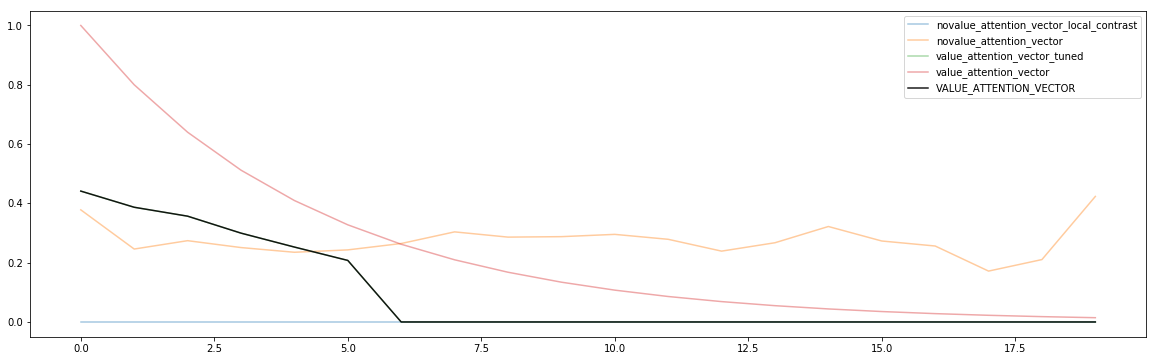

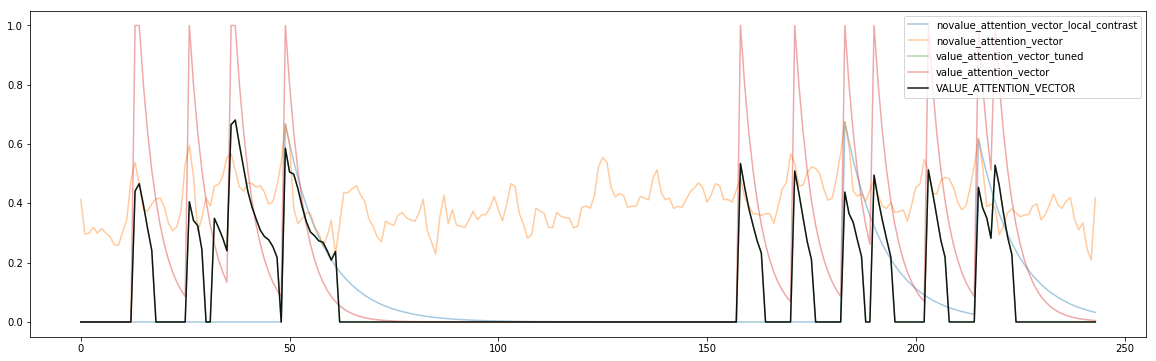

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Поиск нарушений


Сумма Договора:


<IPython.core.display.Javascript object>

In [0]:
#@title Обработка документов { vertical-output: true, output-height: 800, display-mode: "form" }

 




import os
import sys


def interactive_upload(filetype):
  from google.colab import files
  import docx2txt
  
  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs=[]
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text
  
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs

  
#====================================  
#====================================  
_git_branch = "demo-3-fixed" #@param {type:"string"}
#====================================
#====================================

import os
import sys

# AZ:-IMPORT CODE GITHUB-----------------------------------------------------------------------------------
def _init_import_code_from_gh():
  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  print(f"fetching code from GitHub.....{_git_branch}")
  l1 = 'rm -r nlp_tools'
  l2 = f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools'
  os.system(l1)
  os.system(l2)
  import subprocess
  r = subprocess.check_output('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B',
                              shell=True)
  print('🦊 GIT revision:', str(r).replace('\\n', '\t'))

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  untokenize(['code', 'ok'])
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  r = subprocess.check_output('sudo apt-get install antiword', shell=True)
  print(r)

  print('installing docx2txt...')
  r = subprocess.check_output("pip install docx2txt", shell=True)
  r = print(r)
  print(r)
  GLOBALS__['_init_import_code_from_gh'] = True
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow as tf
import tensorflow_hub as hub



def _import_elmo():
  """
  ACHTUNG!! this method is called later by ElmoEmbedder
  """
  
#   if 'elmo' in GLOBALS__:
#     print('👌 Tensorflow hub.Module is already imported ')
#     return GLOBALS__['elmo']

  
  elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz',
                    trainable=False)  # twitter
  print('❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module ')
  print('Tensorflow version is', tf.__version__)

  return elmo
#   GLOBALS__['elmo'] = elmo

#   print(GLOBALS__['elmo'].__dict__)
#   return GLOBALS__['elmo']


# AZ:-INIT EMBEDDER-----------------------------------------------------------------------------------

def _init_embedder():
  if 'elmo_embedder' in GLOBALS__:
    print('👌 Embedder is already created! ')
    return


  from embedding_tools import ElmoEmbedder
  GLOBALS__['elmo_embedder'] = ElmoEmbedder(_import_elmo(), tf, 'elmo', _import_elmo)
  
  print('❤️ DONE creating words embedding model')
  return GLOBALS__['elmo_embedder']



#AZ:-Init chartes context-----------------------------------------------------------------------------------
def _init_charters():
  if 'CharterAnlysingContext' in GLOBALS__:
    print('👌 Charters-related tools are already inited ')
    return 

  from demo_charter import CharterAnlysingContext  
  GLOBALS__['CharterAnlysingContext'] = CharterAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['renderer'])
  print('❤️ DONE initing Charters-related tools and models ')
  
  
  
  
  
def _init_contracts():
  if 'ContractAnlysingContext' in GLOBALS__:
    print('👌 Contracts-related tools are already inited ')
    return 

  from demo import ContractAnlysingContext   
  GLOBALS__['ContractAnlysingContext'] = ContractAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['renderer'])
  print('❤️ DONE initing Contracts-related tools and models ')
  
  
  
  

  
#AZ:- THE CODE----------------------------------------------------------------------------------
def _init_the_code():
  if '_init_the_code' in GLOBALS__:
    print('👌 Code is alredy imported!')
    return 
  
  
  import matplotlib as mpl
  from IPython.core.display import display, HTML
  import matplotlib.pyplot as plt
  from renderer import AbstractRenderer, head_types_colors
  from transaction_values import ValueConstraint
  from legal_docs import org_types
  from demo_charter import head_types_dict, head_types
  
  class DemoRenderer(AbstractRenderer):
    
    def render_subj(self, doc):
      from demo import subject_types_dict
      subj=doc.subject
      s_name=subject_types_dict[ subj[0]].upper()
      
      display(HTML(f'Предмет договора:<h3 style="margin:0">{s_name}<sup> {subj[0]}</sup> </h3> confidence:{subj[1]:20,.2f}'))
    
    def sign_to_text(self, sign: int):
      if sign < 0: return " &lt; "
      if sign > 0: return " &gt; "
      return ' = '

    def probable_value_to_html(self, pv):
      
      vc=pv.value
      
      color = '#333333'
      if vc.sign > 0:
        color = '#993300'
      elif vc.sign < 0:
        color = '#009933'

      return f'<b style="color:{color}">{self.sign_to_text(vc.sign)} {vc.currency} {vc.value:20,.2f} confidence={pv.confidence:20,.2f}</b> '

    def render_contents(doc):
      html = '<h3>Выявленное Содержание документа</h4>'
      html += "<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li> {line} <sup>line {i}</sup></li>'
      html += "</ul>"

      display(HTML(html))


    def render_sections(sections):
      html = '<h3>Выявленное секции документа</h4>'
      html += "<ul>"
      for section_type in sections:
        section:HeadlineMeta = sections[section_type]
        body = section.body.untokenize_cc()[:1000]
        headline = section.subdoc.untokenize_cc()[:500]
        #     line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li><h3> {headline} <sup>type: {section_type}</sup> </h3> <p>{body}</p> </li>'
      html += "</ul>"

      display(HTML(html))
  
  
    def render_values(self, values):      
      if len(values)>0:
        for pv in values:
          h = self.probable_value_to_html(pv)
          display(HTML(h))
      else:
        display(HTML('сумма не найдена'))
    
    def render_contents(self, doc):
      html='<h3>Выявленное Содержание документа</h4>'
      html+="<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html+=f'<li> {line} <sup>line {i}</sup></li>'
      html+="</ul>"
 
  
      display(HTML(html))

    def render_value_section_details(self, value_section_info):
      value_section = value_section_info.body
      headline_doc = value_section_info.subdoc

      headline = headline_doc.untokenize_cc()

      v_names = {
        'value_attention_vector',
        'novalue_attention_vector',

        'novalue_attention_vector_local_contrast',
        'value_attention_vector_tuned'}

      fig = plt.figure(figsize=(20, 6))
      ax = plt.axes()
      for vector_name in v_names:
        ax.plot(value_section.distances_per_pattern_dict[vector_name], label=vector_name, alpha=0.4);
      ax.plot(value_section.distances_per_pattern_dict['value_attention_vector_tuned'], label=vector_name.upper(),
              alpha=0.9, color='black');
      plt.legend(loc='upper right')

      text = self.to_color_text(value_section.tokens_cc,
                           value_section.distances_per_pattern_dict['value_attention_vector_tuned'], _range=(0, 1))
      html = f'<h3>{headline}</h3> <div style="margin-left:4em; font-size=90%">{text}</div>'
      display(HTML(html))

    def to_color_text(self,tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      if len(tokens) == 0:
        return " - empty -"
      if len(weights) != len(tokens):
        raise ValueError("number of weights differs weights={} tokens={}".format(len(weights), len(tokens)))

      #   if()
      vmin = weights.min()
      vmax = weights.max()

      if _range is not None:
        vmin = _range[0]
        vmax = _range[1]

      if print_debug:
        print(vmin, vmax)

      norm = mpl.colors.Normalize(vmin=vmin - 0.5, vmax=vmax)
      html = ""
      cmap = mpl.cm.get_cmap(colormap)

      for d in range(0, len(weights)):
        word = tokens[d]
        if word == ' ':
          word = '&nbsp;_ '

        html += '<span title="{} {:.4f}" style="background-color:{}">{} </span>'.format(
          d,
          weights[d],
          mpl.colors.to_hex(cmap(norm(weights[d]))),
          word)

        #     html+='<span style="background-color:' +mpl.colors.to_hex(cmap(norm(weights[d]) ))+ '">' + str(tokens[d]) + " </span>"
        if tokens[d] == '\n':
          html += "<br>"

      return html
    
    def _render_sentence(self, sentence):
      html = ""
      constraints:List[ValueConstraint] = sentence['constraints']
      for probable_v in constraints:
        html += self.value_to_html(probable_v.value)

      if len(constraints) > 0:
        html += '<div style="border-bottom:1px solid #ccc; margin-top:1em"></div>'
        section = sentence['subdoc']
        html += self.to_color_text(section.tokens, section.distances_per_pattern_dict['deal_value_attention_vector'])
      return html

    


    def render_constraint_values(self, rz):
       

      html = ''
      for head_type in rz.keys():

        r_by_head_type = rz[head_type]

        html += '<hr style="margin-top: 45px">'
        html += '<i style="padding:0; margin:0">решения о пороговых суммах, которые принимает</i><h2 style="color:{}; padding:0;margin:0">{}</h2>'.format(
          head_types_colors[head_type],
          head_types_dict[head_type])

        sentences = r_by_head_type['sentences']
        html += '<h4>{}</h4>'.format(r_by_head_type['caption'])
        html += '<div style="padding-left:80px">'

        if True:
          if len(sentences) > 0:
            for sentence in sentences:
              html += self._render_sentence(sentence)

          else:
            html += '<h4 style="color:crimson">Пороговые суммы не найдены или не заданы</h4>'

        html += '</div>'

      return html
    
    def render_charter_parsing_results(self, org, rz):
      txt_html = self.to_color_text(org['tokens'], org['attention_vector'], _range=[0, 1])

      html = '<div style="background:#eeeeff; padding:0.5em"> recognized NE(s): <br><br> org type:<h3 style="margin:0">  {} </h3>org full name:<h2 style="margin:0">  {} </h2> <br>quote: <div style="font-size:90%; background:white">{}</div> </div>'.format(
        org['type_name'], org['name'], txt_html)
      # html+=txt_html
      html += self.render_constraint_values(rz)

      display(HTML(html))

    def render_color_text(self,tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))



    def print_results(self,doc, results):
      result, (start, end), sentence, meta = results

      html = "<hr>"

      html += self._render_doc_subject_fragments(doc)

      if result is None:
        html += '<h2 style="color:red">СУММА НЕ НАЙДЕНА</h2>'
      else:
        html += '<h2>' + str(result[0]) + ' ' + str(result[1]) + '</h2>'

      for key in meta.keys():
        html += '<div style="font-size:9px">' + str(key) + " = " + str(meta[key]) + "</div>"

      display(HTML(html))
      self.render_color_text(doc.tokens[start:end], doc.sums[start:end])
  
  
  
  GLOBALS__['renderer'] = DemoRenderer()

  
  GLOBALS__['_init_the_code'] = True
  
  
  
    
  #AZ:--------------------------------------------------Init chartes context==== 
  
  
  
  
  
  def read_doc(fn):
    import docx2txt, sys, os
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()

    return text
  
  GLOBALS__['read_doc']=read_doc

  print("❤️ DONE initializing the code")
  
  
      



# AZ:-FINDING_VIOLATIONS--------------------------------------------------------
def find_and_show_violations():

  from IPython.core.display import display, HTML

  from demo import ContractAnlysingContext
  from demo_charter import CharterAnlysingContext
  from renderer import as_headline_2, as_error_html

  print('Поиск нарушений')

  charterAnlysingContext: CharterAnlysingContext = GLOBALS__['CharterAnlysingContext']
  contractAnlysingContext: ContractAnlysingContext = GLOBALS__['ContractAnlysingContext']

  contract = contractAnlysingContext.contract
  charter = charterAnlysingContext.doc
  charter_constraints = charterAnlysingContext.constraints  # XXX: move to doc

  renderer = GLOBALS__['renderer']
  renderer.render_subj(contract)

  import copy

  def convert(v):
    v_converted = copy.copy(v)
    if v.currency in currency_converter:
      v_converted.value = currency_converter[v.currency] * v.value
      v_converted.currency = 'RUB'
      return v_converted
    else:
      display(HTML(as_error_html(
        f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
      return v

  best_value = contractAnlysingContext.find_contract_best_value(convert)

  # rendering:----------------------------

  def _render_violations(ranges_by_group, best_value):
    for group_key in ranges_by_group:
      group = ranges_by_group[group_key]
      display(HTML(as_headline_2(group['name'])))

      for rk in group['ranges']:
        r = group['ranges'][rk]
        display(HTML(r.check_contract_value(best_value, convert, renderer)))

  print("Сумма Договора:")
  renderer.render_values([best_value])
  renderer.render_color_text(best_value.value.context[0], best_value.value.context[1], _range=[0, 1])

  _render_violations(
    charterAnlysingContext.find_ranges_by_group(charter_constraints, convert, verbose=False),
    best_value)

#   display(HTML(renderer.render_constraint_values(charter_constraints)))



# AZ:--------------------------------------------------------FINDING_VIOLATIONS-

#AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
#AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
#AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
#AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX


# VI: @artifex from here:


  
def start_wizard(tb):
  def step1():
    #replace_self_elem(b1.callback_id, '') 
    with tb.output_to(0):
      print(f"\033[1;32mСм. следующие табы\u2713")
    
    with tb.output_to(1):
      
      uploaded = interactive_upload('Устав')
      
      try:
        GLOBALS__['CharterAnlysingContext'].analyze_charter(uploaded[0], True)       
        org, rz = GLOBALS__['CharterAnlysingContext'].doc

        GLOBALS__['renderer'].render_contents(doc)          
        GLOBALS__['renderer'].render_charter_parsing_results(org,rz)
          
      except Exception as e:
        print('ERROR:',e)
      
      
      print(f"\033[1;32mШаг1: сделано\u2713")  
      b2.render()

  def step2():
    replace_self_elem(b2.callback_id, '')   
    with tb.output_to(2):
      print('TAB2')
      
      uploaded = interactive_upload('Договор')            
      try:
        GLOBALS__['ContractAnlysingContext'].analyze_contract(uploaded[0])        
        doc = GLOBALS__['ContractAnlysingContext'].contract
               
        GLOBALS__['renderer'].render_subj(doc)
        GLOBALS__['renderer'].render_contents(doc)
   
      except Exception as e:
        print('ERROR:',e)
      
      print(f"\033[1;32mШаг2: сделано\u2713")  
      b3.render()

  def step3():    
    replace_self_elem(b3.callback_id, '')   
    with tb.output_to(3):
#       #       print('TAB3')
#       #       uploaded = upload_file()
      
#       ## do something 
#       print('Поиск нарушений')
#       from IPython.core.display import display, HTML
#       contract = GLOBALS__['ContractAnlysingContext'].contract
               
#       GLOBALS__['renderer'].render_subj(contract)
#       GLOBALS__['renderer'].render_values(GLOBALS__['ContractAnlysingContext'].contract_values)
#       GLOBALS__['renderer'].render_contents(contract)                
      
# #       GLOBALS__['renderer'].render_charter_parsing_results(GLOBALS__['CharterAnlysingContext'].org, GLOBALS__['CharterAnlysingContext'].constraints)
      
#       h = GLOBALS__['renderer'].render_constraint_values(GLOBALS__['CharterAnlysingContext'].constraints)
#       display(HTML(h))
      
      
#       print(f"\033[1;32mШаг3: сделано\u2713")  
      
      find_and_show_violations()
      b4.render()

  def step4():
    replace_self_elem(b4.callback_id, '')   
    with tb.output_to(4):
      print('TAB4')
      
      ## do something here 
      
      print(f"\033[1;32mШаг4: сделано\u2713")  
      
  b1 = InvokeButton('Начать', step1)
  b2 = InvokeButton('Продолжить', step2)
  b3 = InvokeButton('Продолжить', step3)
  b4 = InvokeButton('Продолжить', step4)
  
  with tb.output_to(0): 
    try:     
      
      ## do preparation here   

      #1.
      _init_import_code_from_gh()
      #2.
      _init_embedder()
      #3.
      _init_the_code()
      #4. 
      _init_charters()
      #5.
      _init_contracts()

      b1.render()
    except:
      print("ERROR:", sys.exc_info())    


    
    
    
    
   
    
#@title Wizard2
tb2 = widgets.TabBar(['Начало', 'Устав', 'Договор', 'Поиск нарушений', 'Протокол'], location='top')    
start_wizard(tb2)